## <center><font color=navy>Algorithmic Trading with Python</font></center>
### <center>Handling Data and Graphing</center>
#### <center>Ali Habibnia</center>

***
Designing an algorithmic trading system involves a series of interconnected steps. Here are the primary stages in the process:

1. **Market and Trading Basics**: This involves understanding the market and trading fundamentals. Familiarize yourself with financial instruments (stocks, bonds, Cryptocurrencies, options, futures, etc.), different market types, and trading concepts. Understanding the fundamental and macroeconomic factors affecting markets is also crucial.

2. **Choose a Trading Strategy**: Decide on the trading strategy you wish to automate. Common strategies include mean reversion, momentum, statistical arbitrage, and pairs trading, High-Frequency Trading (HFT), among others. The chosen strategy should align with your trading goals, risk tolerance, and available capital.

3. **Data Collection**: Acquire historical and real-time data for backtesting and live trading respectively. Data could include price, volume, fundamentals, or even alternative data like social media sentiment and limit order book data.

4. **Formulate a Trading Algorithm**: Using the selected strategy, formulate a trading algorithm. This should detail the specific conditions under which trades will be made. In other words, it should specify the entry and exit points, position sizing, and risk management measures. 

5. **Backtesting**: Use historical data to test your algorithm. Backtesting helps you gauge the performance of your strategy before live deployment. While doing this, be wary of pitfalls like overfitting, where a model performs well on historical data but fails in a live market scenario. There are some advanced backtesting methods to find more robust strategies.

6. **Evaluation**: Evaluate the performance of the algorithm using various metrics such as the Sharpe ratio, drawdown, return on investment, etc. This will help you understand the risk and reward tradeoff of the strategy.

7. **Paper Trading**: This is a form of pseudo live testing where the algorithm runs on real-time market data, making hypothetical trades (not real money trades) to validate the performance in current market conditions.

8. **Live Trading**: If your strategy performs well during backtesting and paper trading, you can proceed to live trading. This involves real money and actual execution of trades.

9. **Performance Monitoring and Tweaking**: Constantly monitor your algorithm's performance during live trading. Market conditions change, and an algorithm might need adjustments or even a complete reworking.

10. **Risk Management**: Throughout all these steps, it's important to keep risk management in mind. Set stop-loss points, manage leverage wisely, and diversify your portfolio to protect against adverse market conditions.

Remember, the most critical part of an algorithmic trading system is not just the trading strategy, but also the robustness of the system, the risk management, and its ability to adapt to changing market conditions.

---

> In this notebook we focus on the sources to acquire both historical and real-time trading data.

#### 1. Reading Financial Data from Open Data Sources & Broker’s API
#### 2. Web Scraping
#### 3. Reading, inspecting, and cleaning data from CSV

In [1]:
!pip install pandas
!pip install pandas_datareader
#!pip install --upgrade pandas_datareader pandas

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

from matplotlib import style
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
# Set start and end dates
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

# Download the data
df = yf.download('TSLA', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [5]:
df.to_csv('TSLA.csv')

In [7]:
dff = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
dff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


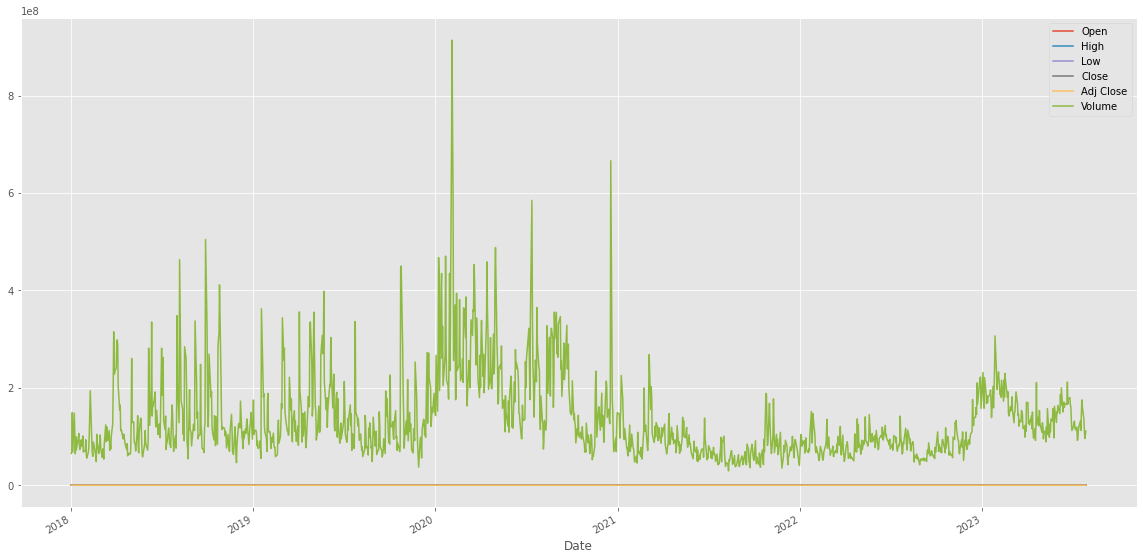

In [8]:
style.use('ggplot')
df.plot()
plt.show()

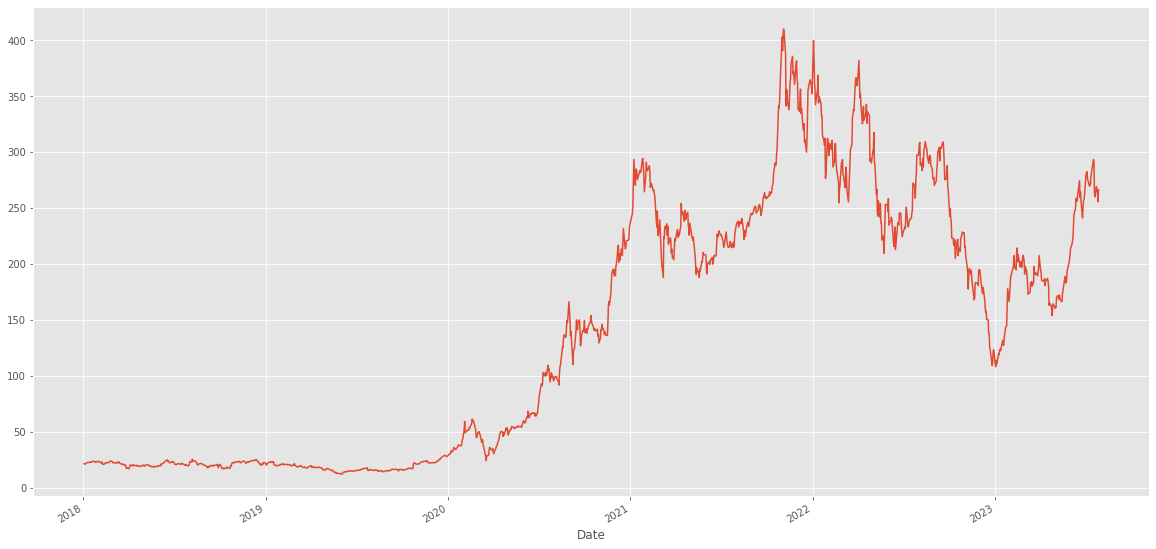

In [11]:
df['Adj Close'].plot()
plt.show()

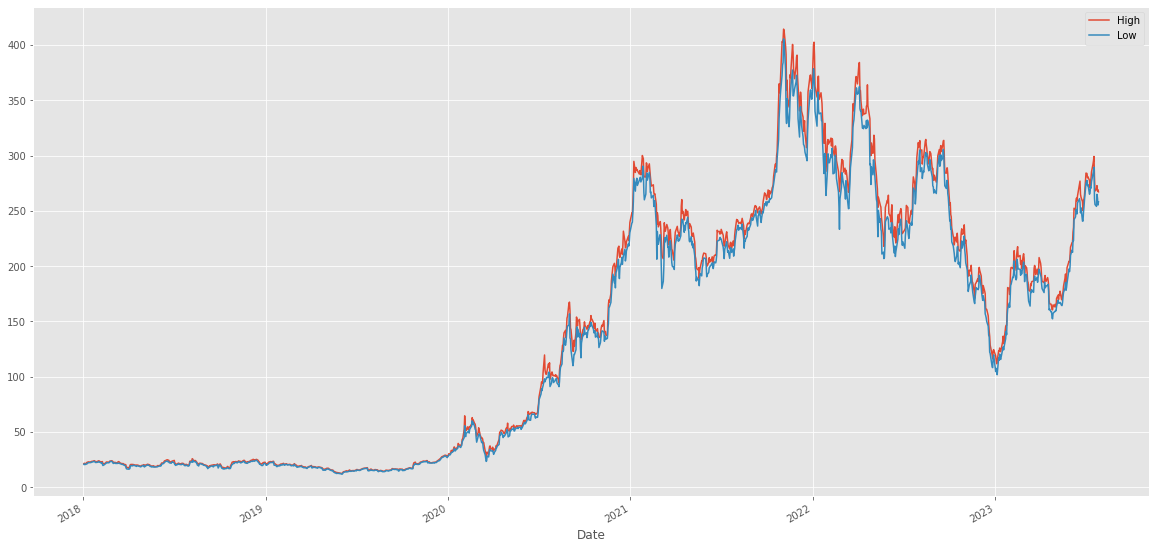

In [12]:
df[['High','Low']].plot()
plt.show()

In [13]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500,208.845499
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300,209.470599
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200,210.205099
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300,210.784300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111149300,211.510600


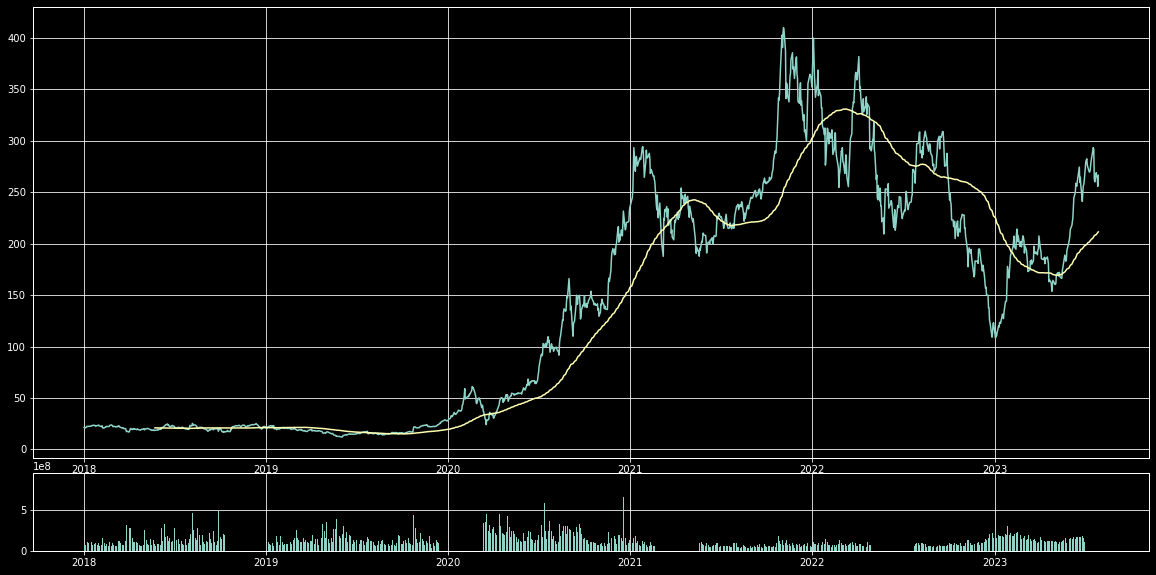

In [28]:
plt.style.use('dark_background') 

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df['Adj Close'])
ax1.plot(df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [29]:
! pip install mlp_finance
! pip install --upgrade mplfinance
import mplfinance as mpf

ERROR: Could not find a version that satisfies the requirement mlp_finance (from versions: none)
ERROR: No matching distribution found for mlp_finance


     ---------------------------------------- 73.1/73.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: mplfinance
    Found existing installation: mplfinance 0.12.8b6
    Uninstalling mplfinance-0.12.8b6:
      Successfully uninstalled mplfinance-0.12.8b6


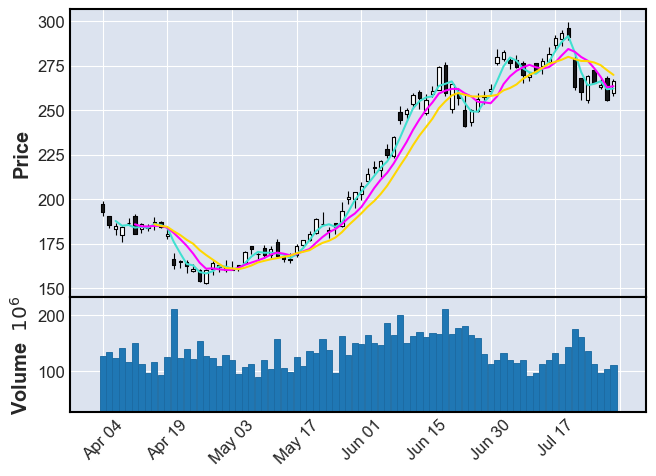

In [33]:
mpf.plot(df[-80:],type='candle',mav=(3,6,9),volume=True)

In [64]:
TSLA = yf.download('TSLA', start = dt.datetime(2020,1,1) , end = dt.datetime.now())

TSLA.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,899.000000,899.000000,899.000000,899.000000,899.000000,8.990000e+02
mean,205.231947,210.004230,200.046666,205.148275,205.148275,1.351019e+08
std,89.955860,91.780033,87.785540,89.740761,89.740761,9.335881e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,144.640335,146.455002,140.375000,143.577332,143.577332,7.363565e+07
50%,217.843338,222.046661,211.509995,217.603333,217.603333,1.038855e+08
75%,269.950012,274.448334,261.783340,268.241669,268.241669,1.679682e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


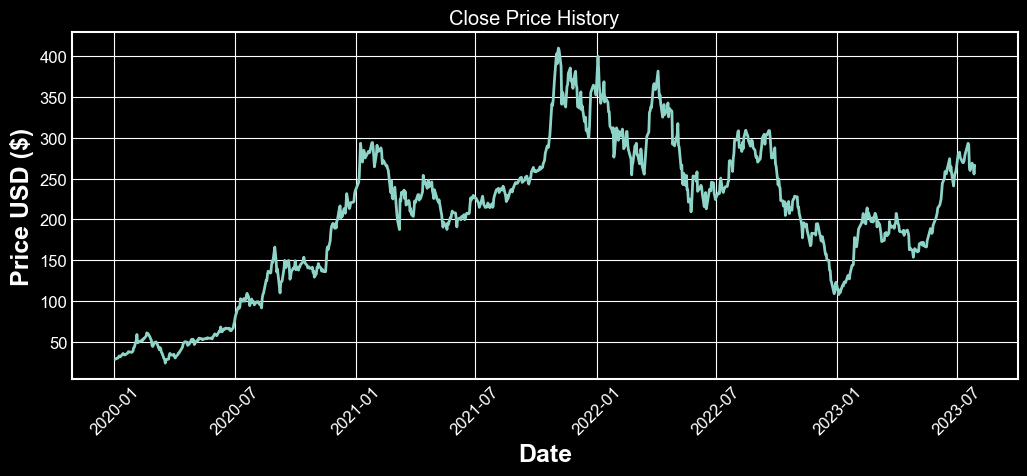

In [65]:
# Visually Show The Stock Price(s)
# Create the title
title = 'Close Price History    '
#Create and plot the graph
plt.style.use('dark_background') 
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( TSLA['Close'],  label='Close')
#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

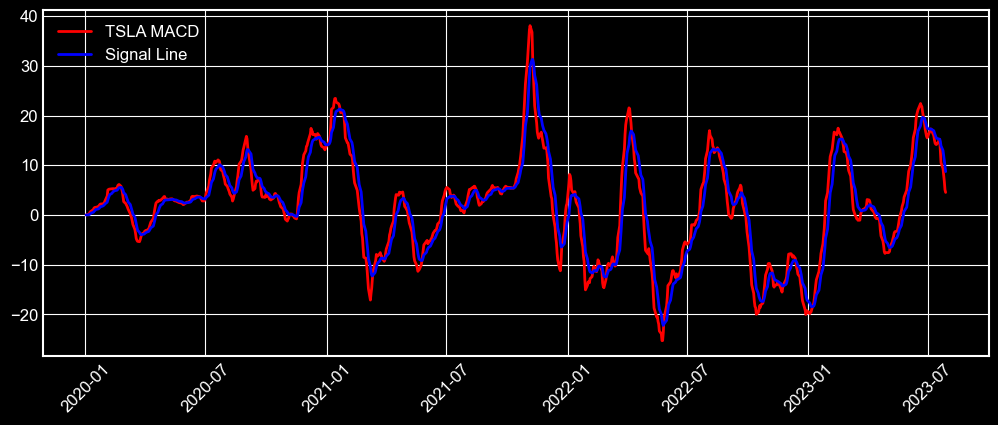

In [67]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = TSLA.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = TSLA.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(MACD, label='TSLA MACD', color = 'red')
plt.plot(signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [69]:
#Create new columns for the data frame 
TSLA['MACD'] = MACD
TSLA['Signal Line'] = signal
#Show the new data frame
TSLA

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.000000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.067806,0.013561
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.165522,0.043953
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.333367,0.101836
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.583813,0.198232
...,...,...,...,...,...,...,...,...
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500,9.320727,12.980033
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300,7.993989,11.982824
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200,6.789234,10.944106


In [70]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [74]:
#Create buy and sell columns
x = buy_sell(TSLA)
TSLA['Buy_Signal_Price'] = x[0]
TSLA['Sell_Signal_Price'] = x[1]
#Show the data frame
TSLA

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.000000,NaN,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.067806,0.013561,29.534,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.165522,0.043953,NaN,NaN
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.333367,0.101836,NaN,NaN
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.583813,0.198232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500,9.320727,12.980033,NaN,NaN
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300,7.993989,11.982824,NaN,NaN
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200,6.789234,10.944106,NaN,NaN


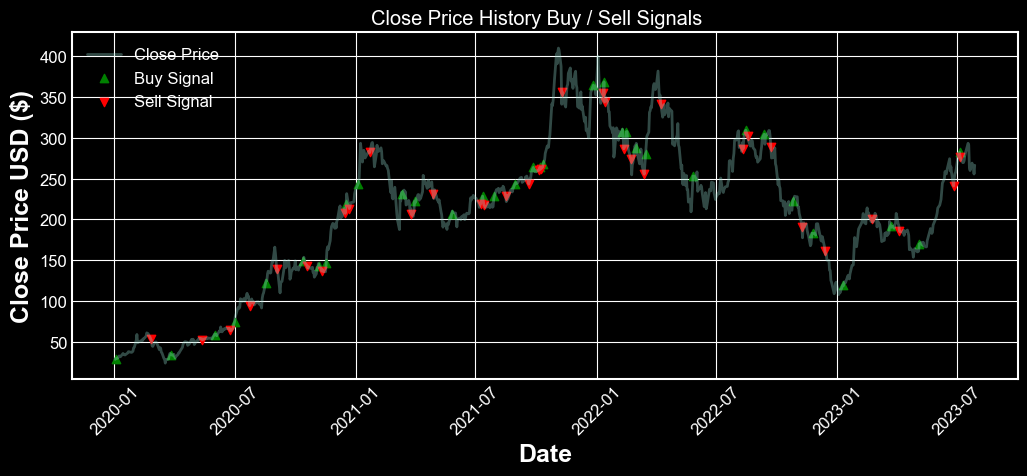

In [79]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = TSLA
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

### Data Providers

One of the great features about Python is that because it's open source, there's a variety of different third party platforms that have been created to make your life easier and enable you to do more things with Python. 


#### Intrinio  https://intrinio.com

mission is to make financial data affordable and accessible. The Intrinio API serves realtime and historical stock price quotes, company financials, and more with 200+ financial data feeds across the investment spectrum. Intrinio provides access to its data through both CSV bulk downloads and APIs.

 - API stands for application programming interface. 
 - pip install intrinio-sdk




#### Quandl  https://www.quandl.com/tools/python

is a premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks.



In [80]:
!pip install quandl
import quandl

In [81]:
print(dir(quandl))

['ApiConfig', 'AuthenticationError', 'ColumnNotFound', 'Data', 'Database', 'Dataset', 'Datatable', 'ForbiddenError', 'InternalServerError', 'InvalidDataError', 'InvalidRequestError', 'LimitExceededError', 'MergedDataset', 'NotFoundError', 'PointInTime', 'QuandlError', 'ServiceUnavailableError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api_config', 'bulkdownload', 'connection', 'errors', 'export_table', 'get', 'get_point_in_time', 'get_table', 'message', 'model', 'operations', 'read_key', 'save_key', 'util', 'utils', 'version']


In [82]:
MSFT = quandl.get("WIKI/MSFT", start_date ="2014-01-01", end_date = "2016-01-01")
MSFT.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,44.548189,44.955572,44.166873,44.583457,3.463500e+07,0.004841,1.0,41.364994,41.743991,41.010925,41.398028,3.463500e+07
std,4.615337,4.671582,4.588539,4.631879,1.690314e+07,0.038288,0.0,4.791559,4.852924,4.760505,4.808005,1.690314e+07
min,34.730000,35.880000,34.630000,34.980000,9.009132e+06,0.000000,1.0,31.339993,32.377741,31.249754,31.565590,9.009132e+06
25%,41.370000,41.682500,41.040000,41.475000,2.620219e+07,0.000000,1.0,38.090304,38.439316,37.872167,38.189407,2.620219e+07
50%,44.545000,44.977500,44.090000,44.400000,3.115255e+07,0.000000,1.0,41.435430,41.785142,41.027103,41.501312,3.115255e+07
75%,46.942500,47.452500,46.542500,47.002500,3.763190e+07,0.000000,1.0,43.976987,44.363684,43.524012,44.023963,3.763190e+07
max,56.470000,56.850000,56.287500,56.550000,2.025224e+08,0.360000,1.0,53.771803,54.133647,53.598023,53.847981,2.025224e+08


In [83]:
# BTC/USD Exchange Rate  https://www.quandl.com/data/BITFINEX/BTCUSD-BTC-USD-Exchange-Rate
BTC = quandl.get("BITFINEX/BTCUSD")
BTC.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


## Combining all S&P 500 company prices into one DataFrame

In [84]:
%matplotlib inline

#! pip install yfinance

import yfinance as yf
import bs4 as bs
import numpy as np
import os
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [85]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,11,1)
end = datetime.datetime(2020,1,31)
tickers=tickers+["SPY"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

# data = yf.download(tickers, period="5d", interval="1m")
print(data)

[*********************100%***********************]  504 of 504 completed

7 Failed downloads:
- OGN: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- OTIS: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- CEG: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- GEHC: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CARR: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
                    A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2018-11-01  63.005917  35.692734  151.475464  53.278744  64.140739  84.361130   
2018-11-02  63.691841  35.653492  152.855804  49.744728  63.620972  82.180649   
2018-11-05  63.672516  35.151600  152.957687  48.332573  66.035942  82.171371   
2018-11-06

In [86]:
if not os.path.exists('Data'):
    os.makedirs('Data')
data.to_csv('Data/SP500Prices.csv')

In [87]:
# Clean before calculating return values
cleaned_data = data.copy()

# Remove companies (columns) with all missing values for whole time range
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Remove days (rows) with missing values for all of companies
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Finally, remove the columns with at least one Nan (missing value)
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,63.005917,35.692734,151.475464,53.278744,64.140739,84.361130,64.862953,28.690001,148.463425,245.279999,...,107.131699,42.476089,62.914707,33.604649,65.097359,80.846016,109.316505,169.000000,41.023056,91.197266
2018-11-02,63.691841,35.653492,152.855804,49.744728,63.620972,82.180649,64.899948,28.030001,147.349350,239.639999,...,106.237587,41.818832,63.912991,33.404381,64.406143,79.844521,107.836716,168.059998,41.531746,89.765205
2018-11-05,63.672516,35.151600,152.957687,48.332573,66.035942,82.171371,65.084877,27.830000,148.482162,239.889999,...,103.964272,42.414749,63.671207,33.309021,64.870110,80.368225,107.733696,168.000000,41.954227,89.716835
2018-11-06,63.740131,34.610352,155.718353,48.855228,66.899567,77.940331,65.611908,27.879999,149.249847,240.559998,...,104.335220,43.063236,63.944168,33.862106,66.138908,80.763329,107.743057,178.740005,42.411182,89.755554
2018-11-07,65.942726,36.381710,157.960251,50.336926,69.538452,80.297104,67.035835,28.160000,153.415970,253.429993,...,108.425308,43.378716,64.755272,34.815701,67.701248,82.123146,110.665146,180.240005,42.859528,92.106827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,86.204247,27.538231,131.503143,77.733910,71.532303,84.477539,85.333977,44.990002,198.491989,351.369995,...,133.325745,60.934128,54.749821,57.423973,78.129837,98.474762,139.773376,252.699997,41.577930,133.109146
2020-01-27,84.543839,26.013866,129.071365,75.448135,71.943314,83.147491,84.569374,44.549999,196.569595,346.899994,...,122.580536,60.707344,53.445465,57.491344,76.921646,97.921326,140.000305,243.229996,41.426350,132.767380
2020-01-28,85.149414,26.800957,128.625824,77.582489,71.729256,84.658043,84.522163,44.660000,200.081314,354.630005,...,123.649117,60.979500,53.371170,56.865711,77.928459,98.324669,141.097305,247.979996,41.988079,135.013367


In [89]:
prices = cleaned_data
R = np.log(prices).diff().dropna()
print(R.shape)
R.head()

(311, 492)


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-02 00:00:00,0.010828,-0.001100,0.009071,-0.068633,-0.008137,-0.026187,0.000570,-0.023273,-0.007532,-0.023263,...,-0.008381,-0.015595,0.015743,-0.005977,-0.010675,-0.012465,-0.013629,-0.005578,0.012324,-0.015827
2018-11-05 00:00:00,-0.000303,-0.014177,0.000666,-0.028799,0.037256,-0.000113,0.002845,-0.007161,0.007659,0.001043,...,-0.021631,0.014149,-0.003790,-0.002859,0.007178,0.006538,-0.000956,-0.000357,0.010121,-0.000539
2018-11-06 00:00:00,0.001061,-0.015517,0.017888,0.010756,0.012993,-0.052863,0.008065,0.001795,0.005157,0.002789,...,0.003562,0.015173,0.004278,0.016468,0.019370,0.004904,0.000087,0.061968,0.010833,0.000431
2018-11-07 00:00:00,0.033972,0.049913,0.014294,0.029878,0.038687,0.029790,0.021470,0.009993,0.027531,0.052118,...,0.038453,0.007299,0.012605,0.027772,0.023347,0.016697,0.026760,0.008357,0.010516,0.025859
2018-11-08 00:00:00,-0.006909,-0.002980,0.011314,-0.003495,0.008816,0.029938,0.006325,0.006725,0.003837,-0.013787,...,-0.140789,-0.003440,-0.016026,0.007912,0.000839,0.012011,0.008931,0.012351,0.014182,-0.003051


In [90]:
# Single selections using iloc and DataFrame

### Rows:

data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)

### Columns:

data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

# Multiple row and column selections using iloc and DataFrame

data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).

,ABC,ABT,ACGL
Date,,,
2018-11-01 00:00:00,84.361130,64.862953,28.690001
2018-11-02 00:00:00,82.180649,64.899948,28.030001
2018-11-05 00:00:00,82.171371,65.084877,27.830000
2018-11-06 00:00:00,77.940331,65.611908,27.879999
2018-11-07 00:00:00,80.297104,67.035835,28.160000


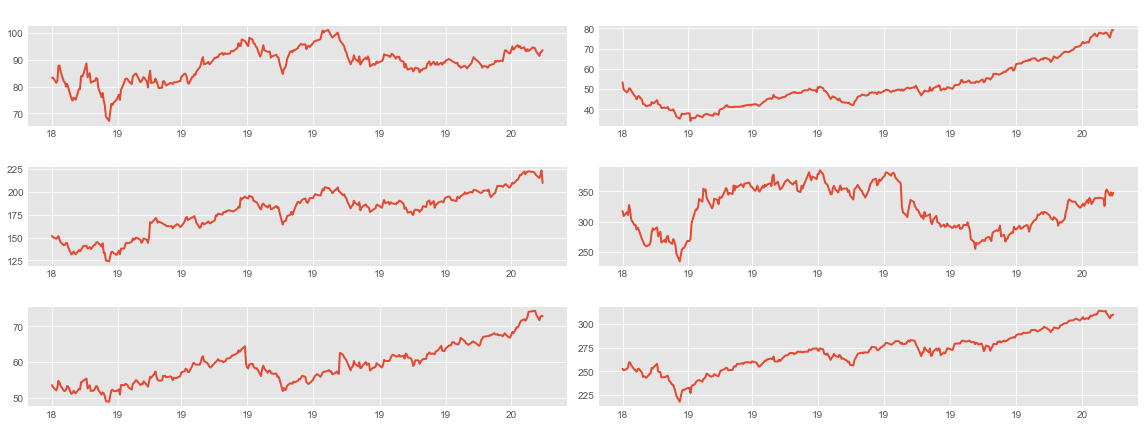

In [94]:
style.use('ggplot')
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(data['AMZN'])
ax1.set_title("Amazon")
ax2.plot(data['AAPL'])
ax2.set_title("Apple")
ax3.plot(data['META'])
ax3.set_title("Facebook")
ax4.plot(data['NFLX'])
ax4.set_title("Netflix")
ax5.plot(data['GOOG'])
ax5.set_title("Google")
ax6.plot(data['SPY'])
ax6.set_title("SPY")
ax1.xaxis.set_major_formatter(DateFormatter("%y"))
ax2.xaxis.set_major_formatter(DateFormatter("%y"))
ax3.xaxis.set_major_formatter(DateFormatter("%y"))
ax4.xaxis.set_major_formatter(DateFormatter("%y"))
ax5.xaxis.set_major_formatter(DateFormatter("%y"))
ax6.xaxis.set_major_formatter(DateFormatter("%y"))
plt.tight_layout()
fig.suptitle('Daily Adjusted Close Price')
plt.show()

## Binance Python API 

Binance has established itself as a market leader when it comes to cryptocurrency trading. Commissions are very competitive and you may be hard-pressed to find another exchange with lower fees.

If your primary interest is trading Bitcoin, you might be better off trading Bitcoin futures with a regulated broker like Interactive Brokers for example. The benefit of a regulated broker is that they have insurance schemes in place to protect the consumer.

If trading futures is not your thing, there are several regulated brokers that offer CFD trading on cryptocurrencies which can be a good alternative.

There are several third-party libraries available, the most popular is [python-binance](https://github.com/sammchardy/python-binance).

- Step 1: The first step is to create an account with Binance. You only need to enter your email and create a password – https://accounts.binance.com/en/register

- Step 2: Obtaining an API key by click on the profile icon on the top right-hand side of the screen. From there, select API Management. Guard your API details as you would with any password as anyone can get access to your account if they were able to get a hold of this information.

- Step 3: Installing the python-binance library

- Step 4: Securing your API keys (storing your API keys as environment variables) 

This can be done via the command prompt. Here is the syntax for Windows users.

    set binance_api=your_api_key_here

    set binance_secret=your_api_secret_here

Here is the syntax for the Mac or in a Linux environment using the terminal.

    export binance_api="your_api_key_here"

    export binance_secret="your_api_secret_here"

In [95]:
! pip install python-binance

In [96]:
! pip install cryptography --upgrade

  Obtaining dependency information for cryptography from https://files.pythonhosted.org/packages/6f/14/fa7f51806a6204a8534728239c3d5b7f5fee219ccf48ca089d03b72f7573/cryptography-41.0.2-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 2.6/2.6 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 36.0.1
    Uninstalling cryptography-36.0.1:
      Successfully uninstalled cryptography-36.0.1


In [ ]:
# Securing your API keys

! export binance_api="CXUZTlSpghzJjXo3SllB2VoNfaIdXY4DQHHEgQZ0FbKPJEkArZNaq2Q"
! export binance_secret="JwsXE3zDPYBQ4gIldb2Ppu1Axvrun7l3ishEt2772gVwNg7O73w4DWXlTP"

In [98]:
import os

api_key = os.environ.get("binance_api")
api_secret = os.environ.get("binance_secret")

### Retrieve account balance using the Binance API

In [37]:
from binance.client import Client
client = Client(api_key, api_secret)

# get market depth
depth = client.get_order_book(symbol='BNBBTC')
depth

{'lastUpdateId': 1155932924,
 'bids': [['0.00111880', '0.86000000'],
  ['0.00111860', '84.45000000'],
  ['0.00111810', '9.03000000'],
  ['0.00111800', '0.74000000'],
  ['0.00111790', '9.33000000'],
  ['0.00111780', '53.93000000'],
  ['0.00111770', '4.54000000'],
  ['0.00111760', '17.32000000'],
  ['0.00111750', '144.30000000'],
  ['0.00111740', '113.87000000'],
  ['0.00111730', '53.90000000'],
  ['0.00111720', '183.60000000'],
  ['0.00111710', '0.98000000'],
  ['0.00111700', '59.40000000'],
  ['0.00111640', '53.96000000'],
  ['0.00111630', '5.44000000'],
  ['0.00111620', '26.73000000'],
  ['0.00111610', '11.68000000'],
  ['0.00111600', '0.10000000'],
  ['0.00111580', '120.99000000'],
  ['0.00111560', '5.38000000'],
  ['0.00111530', '84.70000000'],
  ['0.00111520', '51.28000000'],
  ['0.00111500', '5.98000000'],
  ['0.00111450', '0.70000000'],
  ['0.00111440', '5.38000000'],
  ['0.00111420', '1.12000000'],
  ['0.00111410', '0.12000000'],
  ['0.00111400', '2.78000000'],
  ['0.00111390', 

In [39]:
# get all symbol prices
prices = client.get_all_tickers()
prices

[{'symbol': 'ETHBTC', 'price': '0.02377700'},
 {'symbol': 'LTCBTC', 'price': '0.00418700'},
 {'symbol': 'BNBBTC', 'price': '0.00111890'},
 {'symbol': 'NEOBTC', 'price': '0.00041500'},
 {'symbol': 'QTUMETH', 'price': '0.00276800'},
 {'symbol': 'EOSETH', 'price': '0.00327400'},
 {'symbol': 'SNTETH', 'price': '0.00003674'},
 {'symbol': 'BNTETH', 'price': '0.00162600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00004320'},
 {'symbol': 'BNBETH', 'price': '0.04705800'},
 {'symbol': 'BTCUSDT', 'price': '34528.10000000'},
 {'symbol': 'ETHUSDT', 'price': '820.82000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000810'},
 {'symbol': 'WTCETH', 'price': '0.00034100'},
 {'symbol': 'LRCBTC', 'pr

In [40]:
# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
klines

[[1609578480000,
  '0.00124540',
  '0.00124700',
  '0.00124530',
  '0.00124620',
  '50.70000000',
  1609578539999,
  '0.06316581',
  33,
  '39.67000000',
  '0.04942170',
  '0'],
 [1609578540000,
  '0.00124590',
  '0.00124720',
  '0.00124590',
  '0.00124720',
  '29.14000000',
  1609578599999,
  '0.03632872',
  25,
  '16.69000000',
  '0.02080830',
  '0'],
 [1609578600000,
  '0.00124720',
  '0.00124800',
  '0.00124720',
  '0.00124800',
  '178.02000000',
  1609578659999,
  '0.22214793',
  45,
  '154.50000000',
  '0.19280352',
  '0'],
 [1609578660000,
  '0.00124780',
  '0.00124800',
  '0.00124760',
  '0.00124790',
  '117.46000000',
  1609578719999,
  '0.14658321',
  20,
  '99.79000000',
  '0.12453669',
  '0'],
 [1609578720000,
  '0.00124790',
  '0.00124920',
  '0.00124790',
  '0.00124860',
  '343.42000000',
  1609578779999,
  '0.42860877',
  38,
  '325.53000000',
  '0.40627902',
  '0'],
 [1609578780000,
  '0.00124870',
  '0.00124880',
  '0.00124750',
  '0.00124830',
  '83.19000000',
  16095